In [1]:
from __future__ import print_function, division
import pandas as pd

In [2]:
proj_path = '~/Coding/qishi/Kaggle3/JQXXXX/kaggle/walmart/'
data_path = proj_path + 'data/'

In [3]:
train_data = pd.read_csv(data_path + 'train.csv', sep=',')

* **TripType** - a categorical id representing the type of shopping trip the customer made. This is the ground truth that you are predicting. TripType_999 is an "other" category.
* **VisitNumber** - an id corresponding to a single trip by a single customer
* **Weekday** - the weekday of the trip
* **Upc** - the UPC number of the product purchased
* **ScanCount** - the number of the given item that was purchased. A negative value indicates a product return.
* **DepartmentDescription** - a high-level description of the item's department
* **FinelineNumber** - a more refined category for each of the products, created by Walmart

In [4]:
train_data.head()

,TripType,VisitNumber,Weekday,Upc,ScanCount,DepartmentDescription,FinelineNumber
0,999,5,Friday,6.811315e+10,-1,FINANCIAL SERVICES,1000.0
1,30,7,Friday,6.053882e+10,1,SHOES,8931.0
2,30,7,Friday,7.410811e+09,1,PERSONAL CARE,4504.0
3,26,8,Friday,2.238404e+09,2,PAINT AND ACCESSORIES,3565.0
4,26,8,Friday,2.006614e+09,2,PAINT AND ACCESSORIES,1017.0


In [5]:
train_data.describe()

,TripType,VisitNumber,Upc,ScanCount,FinelineNumber
count,647054.000000,647054.000000,6.429250e+05,647054.000000,642925.000000
mean,58.584511,96167.640078,3.060698e+10,1.108878,3726.884567
std,157.635533,55545.485154,9.120134e+10,0.700776,2780.966158
min,3.000000,5.000000,8.340000e+02,-12.000000,0.000000
25%,27.000000,49268.000000,3.400001e+09,1.000000,1404.000000
50%,39.000000,97074.000000,7.050103e+09,1.000000,3352.000000
75%,40.000000,144316.000000,3.006531e+10,1.000000,5501.000000
max,999.000000,191347.000000,9.789707e+11,71.000000,9998.000000


In [6]:
test_data = pd.read_csv(data_path + 'test.csv', sep=',')

In [7]:
test_data.head()

,VisitNumber,Weekday,Upc,ScanCount,DepartmentDescription,FinelineNumber
0,1,Friday,7.250339e+10,1,SHOES,3002.0
1,1,Friday,1.707711e+09,1,DAIRY,1526.0
2,1,Friday,8.947000e+10,1,DAIRY,1431.0
3,1,Friday,8.849121e+10,1,GROCERY DRY GOODS,3555.0
4,2,Friday,2.840015e+09,1,DSD GROCERY,4408.0


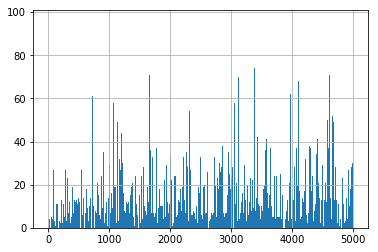

In [8]:
import matplotlib.pyplot as plt
% matplotlib inline
mask = (train_data['VisitNumber'] < 5000) & (train_data['VisitNumber'] > 0) 
train_data[mask]['VisitNumber'].hist(bins=1000)
plt.show()

In [9]:
train_data['Weekday'].value_counts()

Sunday       133975
Saturday     122096
Friday        96247
Monday        83130
Tuesday       72529
Wednesday     71115
Thursday      67962
Name: Weekday, dtype: int64

In [69]:
train_data[['DepartmentDescription',\
            'FinelineNumber','VisitNumber','Upc']].apply(lambda x : np.unique(x).size)

DepartmentDescription       69
FinelineNumber            5196
VisitNumber              95674
Upc                      97715
dtype: int64

In [13]:
len(train_data)

647054

In [15]:
train_data['Upc'].value_counts()

4.011000e+03    7657
6.053886e+10    2501
7.874235e+09    2067
7.874235e+09    1883
4.046000e+03    1652
6.811311e+10    1515
6.053887e+10    1487
3.338320e+09    1405
4.087000e+03    1370
6.053887e+10    1343
4.900000e+09    1018
4.062000e+03     973
4.065000e+03     953
4.900003e+09     896
3.338365e+09     856
7.874235e+09     828
4.900005e+09     815
6.811316e+10     778
6.053890e+10     778
4.078000e+03     750
6.992216e+10     745
7.874211e+09     719
4.093000e+03     698
4.900001e+09     697
2.096650e+10     686
6.053882e+10     644
7.874235e+09     622
4.051000e+03     620
7.225004e+09     618
3.151000e+03     561
                ... 
7.413001e+09       1
8.806156e+11       1
7.278511e+09       1
7.144151e+10       1
6.811311e+10       1
7.169143e+09       1
7.583857e+10       1
7.943761e+10       1
7.871544e+09       1
2.700042e+09       1
7.659406e+10       1
7.163396e+07       1
7.595452e+10       1
7.617070e+10       1
8.434540e+10       1
7.575587e+10       1
4.402124e+09 

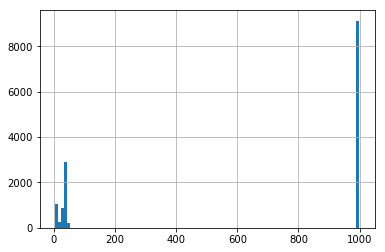

In [16]:
mask = (train_data['ScanCount'] == -1)
train_data[mask]['TripType'].hist(bins=100)

Encode categorical variable (DepartmentDescription) to int

In [17]:
from sklearn import preprocessing

In [18]:
dd_le = preprocessing.LabelEncoder()
dd_le.fit(train_data['DepartmentDescription'])

/home/wei/anaconda2/envs/pt27/lib/python2.7/site-packages/numpy/lib/arraysetops.py:200: FutureWarning: numpy not_equal will not check object identity in the future. The comparison did not return the same result as suggested by the identity (`is`)) and will change.
  flag = np.concatenate(([True], aux[1:] != aux[:-1]))


LabelEncoder()

In [19]:
train_data['Encoded_DepDes'] = dd_le.transform(train_data['DepartmentDescription'])

/home/wei/anaconda2/envs/pt27/lib/python2.7/site-packages/numpy/lib/arraysetops.py:259: FutureWarning: numpy equal will not check object identity in the future. The comparison did not return the same result as suggested by the identity (`is`)) and will change.
  return aux[:-1][aux[1:] == aux[:-1]]


In [20]:
import numpy as np
train_data['Upc'] = train_data['Upc'].fillna(0)

In [21]:
upc_le = preprocessing.LabelEncoder()
upc_le.fit(train_data['Upc'])
train_data['Encoded_Upc'] = upc_le.transform(train_data['Upc'])

In [22]:
wd_dict = {'Monday':1, 'Tuesday':2, 'Wednesday':3, 'Thursday':4, 'Friday':5, 'Saturday':6, 'Sunday':7}
for key, value in wd_dict.items():
    train_data['Weekday'].replace(key, value, inplace=True)

In [23]:
train_data['Encoded_Weekday'] = train_data['Weekday']

In [24]:
train_data['FinelineNumber'] \
= train_data['FinelineNumber'].fillna(-1).astype('int')

In [25]:
cleaned_train_data \
= train_data.drop(['Weekday', 'Upc', 'DepartmentDescription'], axis=1)

In [26]:
cleaned_train_data.head()

,TripType,VisitNumber,ScanCount,FinelineNumber,Encoded_DepDes,Encoded_Upc,Encoded_Weekday
0,999,5,-1,1000,21,66661,5
1,30,7,1,8931,63,58982,5
2,30,7,1,4504,51,41387,5
3,26,8,2,3565,50,9252,5
4,26,8,2,1017,50,7860,5


In [27]:
cleaned_train_data.set_value(cleaned_train_data['TripType']==999,'TripType', 0)

,TripType,VisitNumber,ScanCount,FinelineNumber,Encoded_DepDes,Encoded_Upc,Encoded_Weekday
0,0,5,-1,1000,21,66661,5
1,30,7,1,8931,63,58982,5
2,30,7,1,4504,51,41387,5
3,26,8,2,3565,50,9252,5
4,26,8,2,1017,50,7860,5
5,26,8,2,1017,50,7871,5
6,26,8,1,1017,50,7859,5
7,26,8,1,2802,50,35057,5
8,26,8,1,4501,50,9272,5
9,26,8,-1,3565,50,9245,5


In [28]:
#import seaborn as sns
#pair_corr = sns.pairplot(cleaned_train_data)

In [29]:
#wd_vn_corr = sns.pairplot(cleaned_train_data, x_vars=["Encoded_Weekday"], y_vars=["VisitNumber"])

In [30]:
#from bokeh.charts import Scatter, output_file, show

#p = Scatter(cleaned_train_data, x='Encoded_Weekday', y='VisitNumber', title="Weekday vs VisitNumber", color="navy",
#            xlabel="Encoded_Weekday", ylabel="VisitNumber")

#output_file("scatter.html")

#show(p)

In [31]:
#from bokeh.charts import Histogram
#hist = Histogram(cleaned_train_data['ScanCount'], title="Histogram of ScanCount")
#show(hist)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f7ba450fbd0>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x7f7ba47fd950>]], dtype=object)

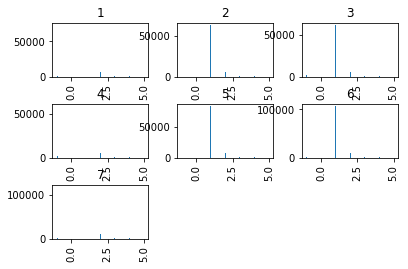

In [32]:
cleaned_train_data['ScanCount'].hist(by=cleaned_train_data['Encoded_Weekday'], bins=100, range=(-1,5))

In [33]:
cleaned_train_data.groupby('Encoded_Weekday')['ScanCount'].sum()

Encoded_Weekday
1     92440
2     80667
3     78711
4     75433
5    106945
6    135158
7    148150
Name: ScanCount, dtype: int64

In [34]:
#from bokeh.charts import BoxPlot
#p = BoxPlot(cleaned_train_data, label='Encoded_Weekday', values='ScanCount')
#show(p)


In [35]:
#from bokeh.charts import Scatter, output_file, show

#p = Scatter(cleaned_train_data, x='Encoded_DepDes', y='Encoded_Upc', title="DepDes vs Upc", color="navy",
#            xlabel="DepDes", ylabel="Upc")

#output_file("scatter.html")

#show(p)

**One visit can have only one trip type:**

In [36]:
temp = cleaned_train_data.groupby('VisitNumber')['TripType'].apply(set).str.len() > 1
temp.sum()

0

**Feature list:(To be continued)** 

* number of items purchased per visit
* number of items purchased per Department per visit
* number of items returned per visit

In [37]:
cleaned_train_data['Encoded_DepDes'].max()

68

In [38]:
len(set(cleaned_train_data['FinelineNumber']))

5196

In [39]:
vn = cleaned_train_data['VisitNumber']
vn_shift = cleaned_train_data['VisitNumber'].shift(1)

In [40]:
reindexed_rows = (vn != vn_shift).cumsum()

In [41]:
cleaned_train_data['indexed_by_VisitNumber'] = reindexed_rows

In [42]:
scancount_sum_by_vn = cleaned_train_data.groupby('VisitNumber', as_index=False)['ScanCount'].sum()


In [43]:
cleaned_train_data = cleaned_train_data.join(scancount_sum_by_vn.set_index('VisitNumber'), on='VisitNumber', rsuffix='_sum_by_vn')

In [44]:
depdes_num_by_vn = cleaned_train_data.groupby('VisitNumber', as_index=False).agg({'Encoded_DepDes':pd.Series.nunique})

In [45]:
cleaned_train_data = cleaned_train_data.join(depdes_num_by_vn.set_index('VisitNumber'), on='VisitNumber', rsuffix='_by_vn')

In [46]:
fineline_num_by_vn = cleaned_train_data.groupby('VisitNumber', as_index=False).agg({'FinelineNumber':pd.Series.nunique})

In [47]:
cleaned_train_data = cleaned_train_data.join(fineline_num_by_vn.set_index('VisitNumber'), on='VisitNumber', rsuffix='_by_vn')

** To be explored **
* number of different UPCs
* max number of items purchased from one single department 
* min number of items purchased from one single department
* max number of items purchased with the same fineline number
* min number of itmes purchased with the same fineline number

In [48]:
# number of different UPCs for each visit
upc_num_by_vn = cleaned_train_data.groupby('VisitNumber', as_index=False).agg({'Encoded_Upc':pd.Series.nunique})
cleaned_train_data = cleaned_train_data.join(upc_num_by_vn.set_index('VisitNumber'), on='VisitNumber', rsuffix='_by_vn')

In [49]:
a = np.array([[8, 8, 3, 0],[8, 2, 1, 7],[8, 1, 8, 4],[8, 3, 0, 5],[4, 7, 5, 9]])
from scipy import stats
stats.mode(a)

ModeResult(mode=array([[8, 1, 0, 0]]), count=array([[4, 1, 1, 1]]))

In [50]:
from scipy import stats
# max number of items purchased from one single department
max_num_from_single_dep_by_vn =  \
cleaned_train_data[['VisitNumber','Encoded_DepDes']].groupby('VisitNumber', as_index=False)\
.agg(lambda x: stats.mode(x['Encoded_DepDes']).count[0])
cleaned_train_data = \
cleaned_train_data.join(max_num_from_single_dep_by_vn.set_index('VisitNumber'), on='VisitNumber', rsuffix='_max_from_dep_by_vn')

In [51]:
from scipy import stats
# dep number from which the max number of items is purchased 
max_num_from_single_dep_by_vn =  \
cleaned_train_data[['VisitNumber','Encoded_DepDes']].groupby('VisitNumber', as_index=False)\
.agg(lambda x: stats.mode(x['Encoded_DepDes'])[0])
cleaned_train_data = \
cleaned_train_data.join(max_num_from_single_dep_by_vn.set_index('VisitNumber'), \
                        on='VisitNumber', rsuffix='_dep_has_max_by_vn')

In [52]:
from scipy import stats
# fineline number from which the max number of items is purchased 
max_num_from_single_dep_by_vn =  \
cleaned_train_data[['VisitNumber','FinelineNumber']].groupby('VisitNumber', as_index=False)\
.agg(lambda x: stats.mode(x['FinelineNumber']).count[0])
cleaned_train_data = \
cleaned_train_data.join(max_num_from_single_dep_by_vn.set_index('VisitNumber'), \
                        on='VisitNumber', rsuffix='_max_from_FinelineNumber_by_vn')

In [53]:
from scipy import stats
# fineline number from which the max number of items is purchased 
max_num_from_single_dep_by_vn =  \
cleaned_train_data[['VisitNumber','FinelineNumber']].groupby('VisitNumber', as_index=False)\
.agg(lambda x: stats.mode(x['FinelineNumber'])[0])
cleaned_train_data = \
cleaned_train_data.join(max_num_from_single_dep_by_vn.set_index('VisitNumber'), \
                        on='VisitNumber', rsuffix='_FinelineNumber_has_max_by_vn')

In [54]:
#from bokeh.charts import Scatter, output_file, show

#p = Scatter(triptype_vnsum, x='ScanCount_sum_by_vn',y='TripType', title="TripType vs ScanCount_sum_by_vn",
#            xlabel="ScanCount_sum_by_vn", ylabel="TripType")

#output_file("scatter.html")

#show(p)

**K-fold cross validation**

In [55]:
y = cleaned_train_data['TripType']

In [56]:
X = cleaned_train_data.drop(['TripType','indexed_by_VisitNumber'], axis=1)

In [57]:
from sklearn.model_selection import train_test_split

In [59]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=0)

**SVM**

In [121]:
#from sklearn import svm
#clf = svm.SVC(kernel='linear', C=1).fit(X_train, y_train)
#clf.score(X_test, y_test)


**Random Forest**

In [60]:

from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators=50, n_jobs=4)
clf.fit(X_train,y_train)
clf_probs = clf.predict_proba(X_test)



In [64]:
clf_probs.shape

(258822, 38)

In [61]:
from sklearn.metrics import log_loss
logloss_score = log_loss(y_test, clf_probs)


In [62]:
logloss_score

0.55014133818934252

In [ ]:
importances = clf.feature_importances_
std = np.std([tree.feature_importances_ for tree in clf.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")


for f in range(X.shape[1]):
    print("%d. feature %d : %s (%f)" % (f + 1, indices[f], X.columns[indices[f]],importances[indices[f]]))
from sklearn.model_selection import cross_val_score
scores = cross_val_score(clf, X_test, y_test.values)
print(scores)

In [251]:
from sklearn.metrics import roc_curve

y_pred_rf = clf.predict_proba(X_test)[:, 1]
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_pred_rf)

Feature ranking:
1. feature 6 : ScanCount_sum_by_vn (0.148285)
2. feature 11 : Encoded_DepDes_dep_has_max_by_vn (0.125108)
3. feature 13 : FinelineNumber_FinelineNumber_has_max_by_vn (0.104053)
4. feature 0 : VisitNumber (0.094574)
5. feature 9 : Encoded_Upc_by_vn (0.081003)
6. feature 8 : FinelineNumber_by_vn (0.076640)
7. feature 4 : Encoded_Upc (0.059058)
8. feature 7 : Encoded_DepDes_by_vn (0.057108)
9. feature 3 : Encoded_DepDes (0.056789)
10. feature 10 : Encoded_DepDes_max_from_dep_by_vn (0.053836)
11. feature 2 : FinelineNumber (0.051653)
12. feature 5 : Encoded_Weekday (0.051104)
13. feature 12 : FinelineNumber_max_from_FinelineNumber_by_vn (0.029180)
14. feature 1 : ScanCount (0.011609)
[ 0.84469271  0.85359097  0.85366843]

Feature ranking:
1. feature 11 (0.130586)
2. feature 6 (0.128156)
3. feature 12 (0.106438)
4. feature 9 (0.098013)
5. feature 0 (0.097655)
6. feature 8 (0.082776)
7. feature 7 (0.066037)
8. feature 4 (0.060937)
9. feature 3 (0.056772)
10. feature 10 (0.056044)
11. feature 2 (0.053217)
12. feature 5 (0.051643)
13. feature 1 (0.011724)
[ 0.84574733  0.8475867   0.84802291]

Feature ranking:
1. feature 6 (0.158740)
2. feature 11 (0.140095)
3. feature 0 (0.117877)
4. feature 9 (0.086389)
5. feature 4 (0.077089)
6. feature 8 (0.075116)
7. feature 2 (0.071402)
8. feature 7 (0.068468)
9. feature 3 (0.066481)
10. feature 10 (0.064238)
11. feature 5 (0.059339)
12. feature 1 (0.014764)
[ 0.81314682  0.81389095  0.81558722]

Feature ranking:
1. feature 6 (0.170532)
2. feature 0 (0.143676)
3. feature 4 (0.107128)
4. feature 3 (0.097775)
5. feature 2 (0.097184)
6. feature 8 (0.090636)
7. feature 9 (0.086081)
8. feature 5 (0.066485)
9. feature 7 (0.063492)
10. feature 10 (0.061763)
11. feature 1 (0.015248)
[ 0.72123263  0.71942229  0.72091163]

Previous experiment
Feature ranking:
1. feature 6 (0.193196)
2. feature 0 (0.166470)
3. feature 4 (0.131090)
4. feature 8 (0.125677)
5. feature 2 (0.116519)
6. feature 3 (0.102076)
7. feature 7 (0.076694)
8. feature 5 (0.069855)
9. feature 1 (0.018423)
[ 0.67276647  0.67349777  0.67243198]

In [54]:
from sklearn.ensemble import RandomForestClassifier
clf0  = RandomForestClassifier(n_estimators=50, n_jobs=4)

In [55]:
clf0.fit(X_train.ix[:,:'Encoded_Weekday'],y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=50, n_jobs=4, oob_score=False, random_state=None,
            verbose=0, warm_start=False)

In [56]:
importances = clf0.feature_importances_
std = np.std([tree.feature_importances_ for tree in clf0.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(X.shape[1]-1):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

Feature ranking:
1. feature 0 (0.422432)
2. feature 4 (0.259484)
3. feature 2 (0.162345)
4. feature 3 (0.069524)
5. feature 5 (0.058636)
6. feature 1 (0.027580)


In [57]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(clf0, X_test.ix[:,:'Encoded_Weekday'], y_test)

In [58]:
scores

array([ 0.31458968,  0.31297524,  0.31616104])